# Key Features

In [19]:
# import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Clarisse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Clarisse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
# importing the data

movies=pd.read_csv('Data/movies_preprocessed.csv')
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,NaN
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],False
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],False


### Graph title length (words, characters)

In [6]:
# Helper function to count the words in movie titles
def count_words(x):
    # remove eventual spaces at the beginning and at the end of the string, split the string, count the words
    return len(x.strip().split())

In [7]:
# Add column with title length
movies['Title_length'] = movies['Movie_name'].apply(count_words)


/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & title length')

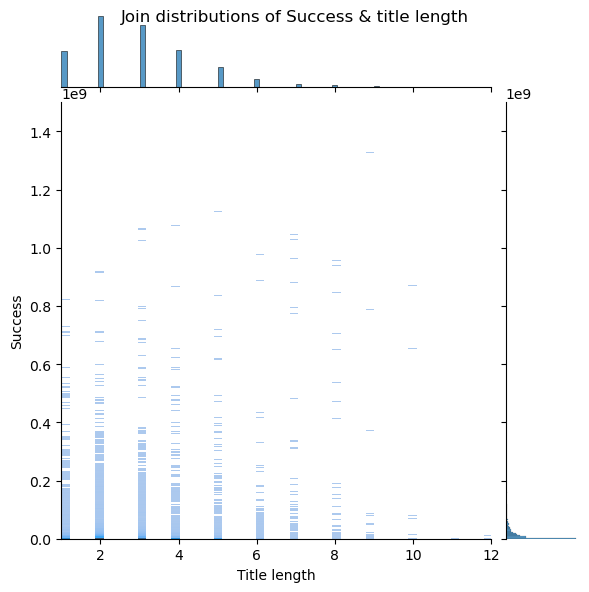

In [16]:
# Plot the join distributions of audience IMdB rating & title length
# As there are more short titles, looking only at the mean rating for each title length is biased

jplot = sns.jointplot(x='Title_length', y='Movie_box_office_revenue', data=movies, kind='hist', xlim=(1,12),ylim=(0,1500000000))
#jplot = sns.jointplot(x='Title_length', y='Audience_imdb_rating', data=cmu_imdb, kind='hist', xlim=(1,12))

plt.xlabel('Title length')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & title length')

In [11]:
# Add column with title length
movies['Title_characters'] = movies['Movie_name'].apply(len)


/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & number of characters in title')

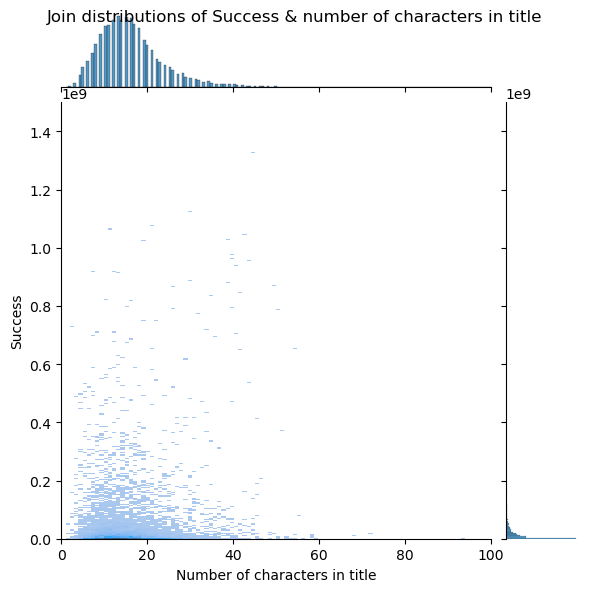

In [18]:
# Plot the join distributions of success indicator & number of characters in the title

jplot = sns.jointplot(x='Title_characters', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,100),ylim=(0,1500000000))

plt.xlabel('Number of characters in title')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & number of characters in title')

### Graph Tagging : grammatical (verbs, adjective)


In [49]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english")) # we focus on english titles only
from nltk.tokenize import sent_tokenize, word_tokenize

In [50]:
tag = {'Nouns': [], 'Pronouns': [],'Adjectives':[],
          'Verbs':[],'Adverbs':[],'Prepositions':[],
          'Conjunctions':[],'Interjections':[]}

tag_df=pd.DataFrame(data=tag)

tag_df.head()

,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,Conjunctions,Interjections


In [51]:
for i in range (0,len(movies)):

    Tags=[0,0,0,0,0,0,0,0]

    # load title
    title=movies['Movie_name'].iloc[i]
    
    # cut into individual words
    title_list=word_tokenize(title)
    
    # tagging parts of speech
    post_tags=nltk.pos_tag(title_list)
    
    Types=[]
    for word, pos_tag in post_tags:
        Types.append(pos_tag)
    

    for type in Types:
        if type.startswith('NN'):
            Tags[0]+=1
        elif type.startswith('PRP'):
            Tags[1]+=1
        elif type.startswith('JJ'):
            Tags[2]+=1
        elif type.startswith('VB'):
            Tags[3]+=1
        elif type.startswith('RB'):
            Tags[4]+=1
        elif type.startswith('IN'):
            Tags[5]+=1
        elif type.startswith('CC'):
            Tags[6]+=1
        elif type.startswith('UH'):
            Tags[7]+=1

    tag_df.loc[i]=Tags

In [52]:
len(tag_df)

26772

In [53]:
len(movies)

26772

In [54]:
movies = pd.concat([movies, tag_df], axis=1)
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,Conjunctions,Interjections
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False,2,0,0,0,0,1,0,0
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False,4,0,0,1,1,1,0,0
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,NaN,2,0,0,0,0,1,0,0
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],False,2,0,0,0,0,0,0,0
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],False,3,0,0,0,0,0,0,0


### Graph NER : proper nouns (characters, dates, location)


In [ ]:
# Titles containing the main characters name

In [55]:
ner = {'ORGANIZATION': [], 'PERSON': [],'LOCATION':[],
          'DATE':[],'TIME':[],'MONEY':[], 'PERCENT':[],
          'FACILITY':[],'GPE':[]}


ner_df=pd.DataFrame(data=ner)

ner_df.head()

,ORGANIZATION,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE


In [59]:
for i in range (0,len(movies)):
    
    NER=[0,0,0,0,0,0,0,0,0]

    # load title
    title=movies['Movie_name'].iloc[i]
    
    # cut into individual words
    title_list=word_tokenize(title)
    
    # tagging NER
    ne_tree = nltk.ne_chunk(nltk.pos_tag(title_list))

    # Access named entities and their labels

    ne_label=[]
    for subtree in ne_tree:
        if isinstance(subtree, nltk.Tree):  # Check if the subtree is a named entity
            ne_label.append(subtree.label())
            #ne_words = " ".join([word for word, pos_tag in subtree.leaves()])
            #print(f"Named Entity: {ne_words}, Label: {ne_label}")
        #else:  # Non-named entity
            #print(f"Word: {subtree[0]}, POS Tag: {subtree[1]}")

    for type in Types:
        if type=='ORGANIZATION':
            Tags[0]+=1
        elif type=='PERSON':
            Tags[1]+=1
        elif type=='LOCATION':
            Tags[2]+=1
        elif type=='DATE':
            Tags[3]+=1
        elif type=='TIME':
            Tags[4]+=1
        elif type=='MONEY':
            Tags[5]+=1
        elif type=='PERCENT':
            Tags[6]+=1
        elif type=='FACILITY':
            Tags[7]+=1
        elif type=='GPE':
            Tags[8]+=1

    ner_df.loc[i]=NER
    


In [60]:
movies = pd.concat([movies, ner_df], axis=1)
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,...,Interjections,ORGANIZATION,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",...,0,0,0,0,0,0,0,0,0,0
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",...,0,0,0,0,0,0,0,0,0,0
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,...,0,0,0,0,0,0,0,0,0,0
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],...,0,0,0,0,0,0,0,0,0,0
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],...,0,0,0,0,0,0,0,0,0,0


### Graph sentiment analysis 


In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [26]:
sia = SentimentIntensityAnalyzer()
L_pos=[]
L_neg=[]


for i in range(len(movies)):
    movie_name = movies.iloc[i].Movie_name
    scores = sia.polarity_scores(movie_name)
    L_pos.append(scores["pos"])
    L_neg.append(scores["neg"])


movies['pos_sentiment']=L_pos
movies['neg_sentiment']=L_neg

movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Title_length,Title_characters,pos_sentiment,neg_sentiment
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False,3,14,0.0,0.000
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False,8,53,0.0,0.402
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,NaN,4,16,0.0,0.000
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],False,3,25,0.0,0.000
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],False,3,24,0.0,0.000


/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & Positive sentiment of title')

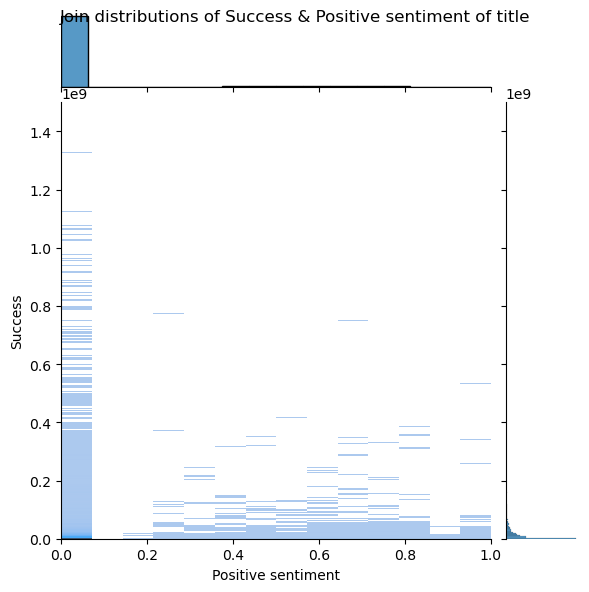

In [28]:
# Plot the join distributions of success indicator & positive sentiment of the title

jplot = sns.jointplot(x='pos_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Positive sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Positive sentiment of title')

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & Negative sentiment of title')

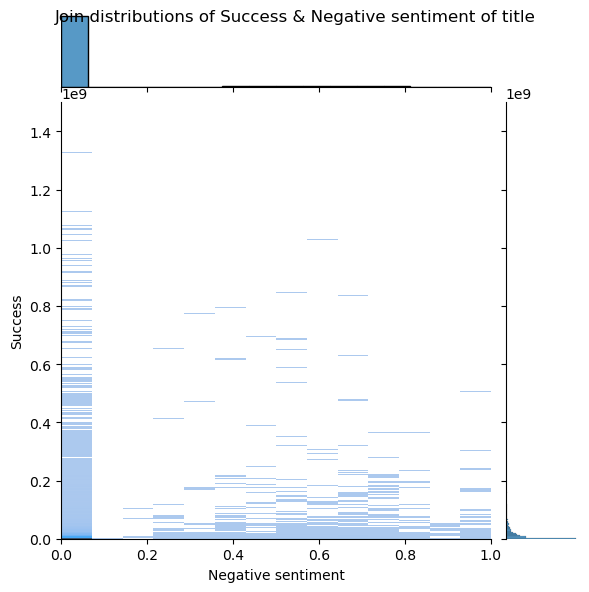

In [29]:
# Plot the join distributions of success indicator & negative sentiment of the title

jplot = sns.jointplot(x='neg_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Negative sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Negative sentiment of title')

### Graph document classification or topic detection